<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#store'>Store Set</a></li>
<li><a href='#germany'>Germany Set</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [16]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py file
import prepare as p
import wrangle as w

In [17]:
# Set default matplotlib plot style to 'bmh'
mpl.style.use('bmh')

<div style='background-color: orange'>
<a id='store'></a>
    <b><u><i><h1 style='text-align: center'>
        Store Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#storesplit'>Split</a></li>
<li><a href='#storevisualtarget'>Visualize Target Over-Time</a></li>
<li><a href='#storevisualdiff'>Visualize Difference Over-Time</a></li>
    <li><a href='#storevisualseasonal'>Visualize Seasonal</a></li>
    <li><a href='#storevisualseasonalsub'>Visualize Seasonal Sub-Plot</a></li>
    <li><a href='#storevisuallag'>Visualize Lag Plot</a></li>
    <li><a href='#storevisualauto'>Visualize Autocorrelation</a></li>
    
<li><a href='#storemisc'>Miscellaneous</a></li>

<a id='storesplit'></a>
### Split

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [2]:
# Get the prepared store dataframe
store = p.prepare_store()
store.shape

(913000, 14)

In [7]:
# 5 years are present within the dataframe
store.index.min(), store.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

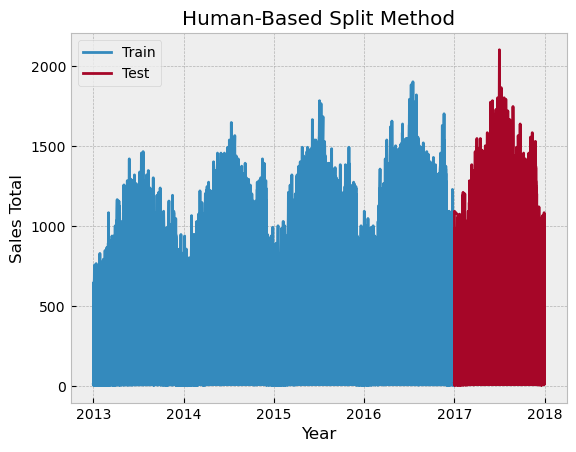

In [18]:
# Split the store dataframe via Human-Based
train_human = store[:'2016']
test_human = store['2017']
plt.plot(train_human.index, train_human.sales_total, label='Train')
plt.plot(test_human.index, test_human.sales_total, label='Test')
plt.title('Human-Based Split Method')
plt.xlabel('Year')
plt.ylabel('Sales Total')
plt.legend()
plt.show()

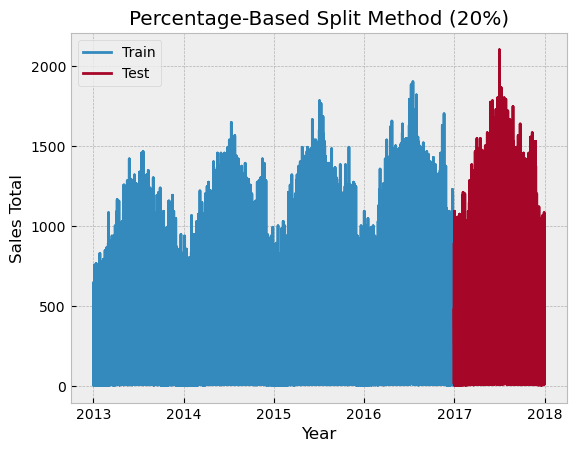

In [30]:
# Split the store dataframe via Percentage-Based
train_size = 0.8
n = store.shape[0]
test_start_index = round(train_size * n)

train_pct = store.sort_index()[:test_start_index]
test_pct = store.sort_index()[test_start_index:]

plt.plot(train_pct.index, train_pct.sales_total, label='Train')
plt.plot(test_pct.index, test_pct.sales_total, label='Test')
plt.title('Percentage-Based Split Method (20%)')
plt.xlabel('Year')
plt.ylabel('Sales Total')
plt.legend()
plt.show()

Both come out the same...

Using the Human-Based method

In [35]:
store_train = store[:'2016']
store_test = store['2017']

---

<a id='storevisualtarget'></a>
### Visualize Target Over-Time

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

In [63]:
# Identify continuous columns
continuous_columns = store_train.select_dtypes(include=float).columns.to_list()
continuous_columns

['item_price', 'sales_total']

In [64]:
# Identify Methods of resampling
resample_methods = ['Y', 'M', 'W']
resample_methods

['Y', 'M', 'W']

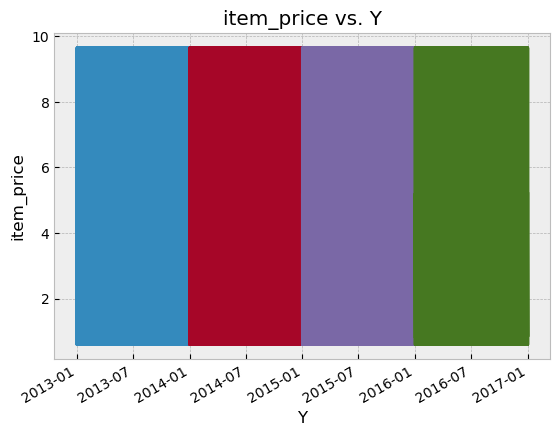

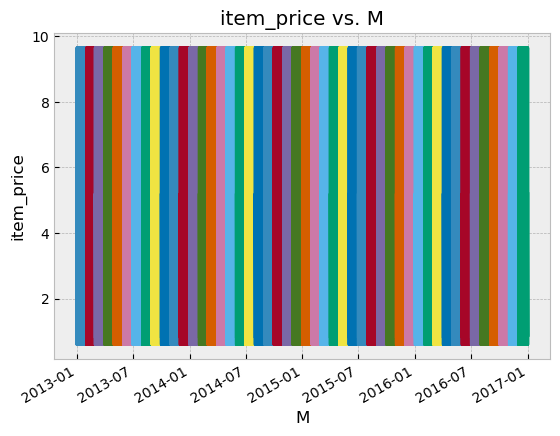

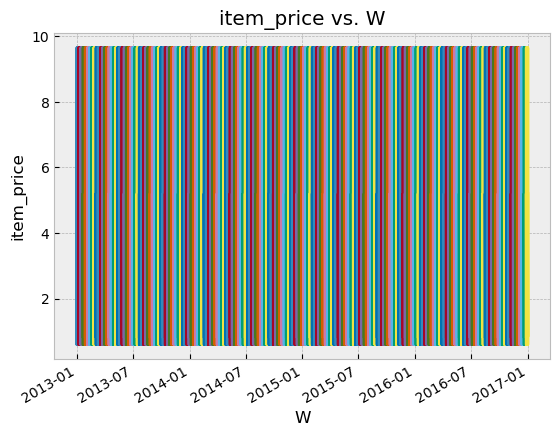

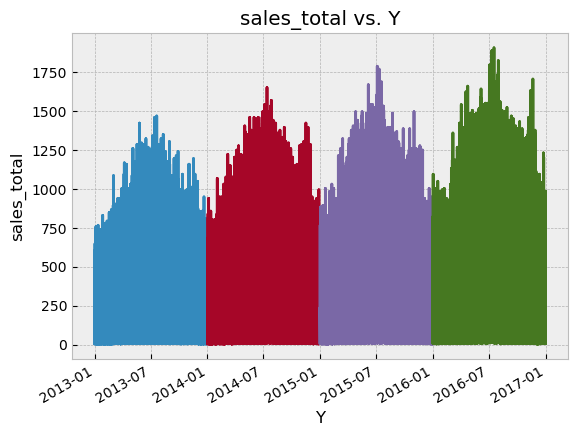

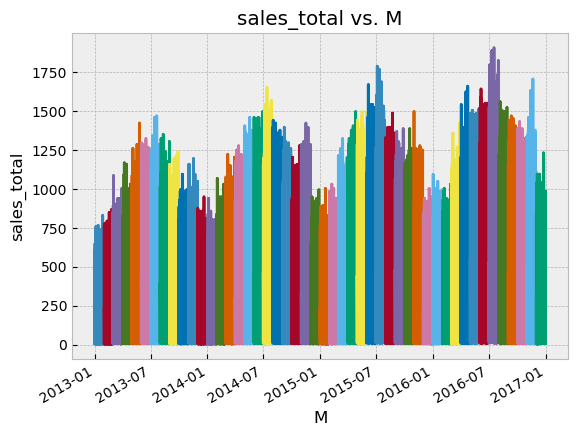

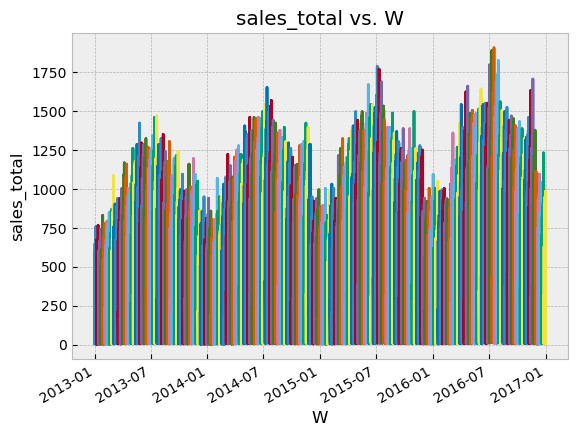

In [53]:
for col in continuous_columns:
    for method in resample_methods:
        store_train[col].resample(method).plot()
        plt.title(f'{col} vs. {method}')
        plt.xlabel(f'{method}')
        plt.ylabel(f'{col}')
        plt.show()

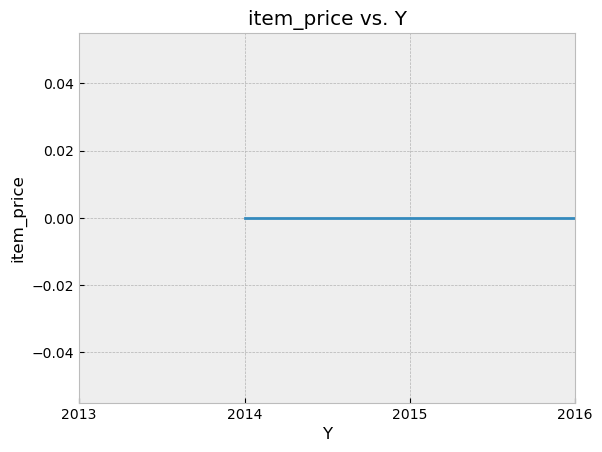

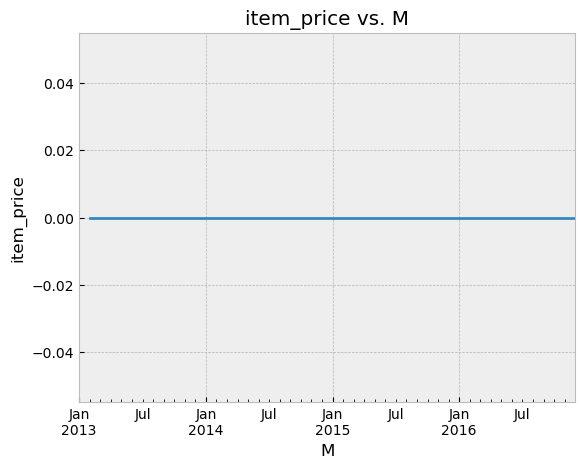

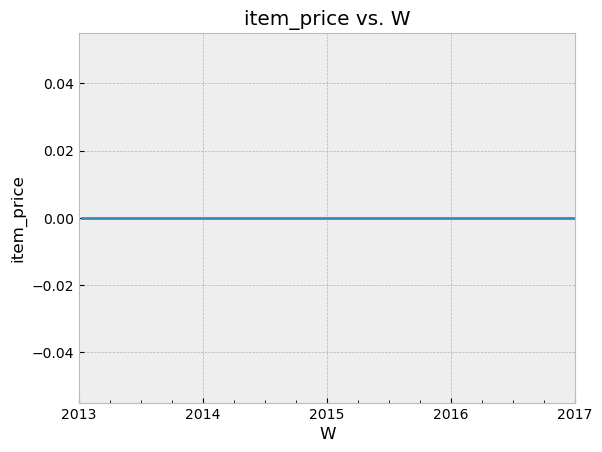

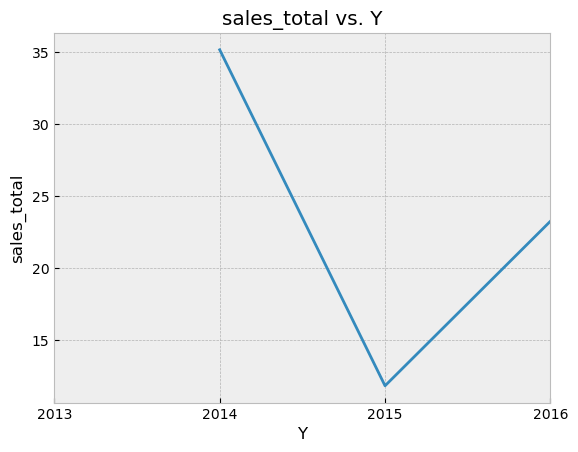

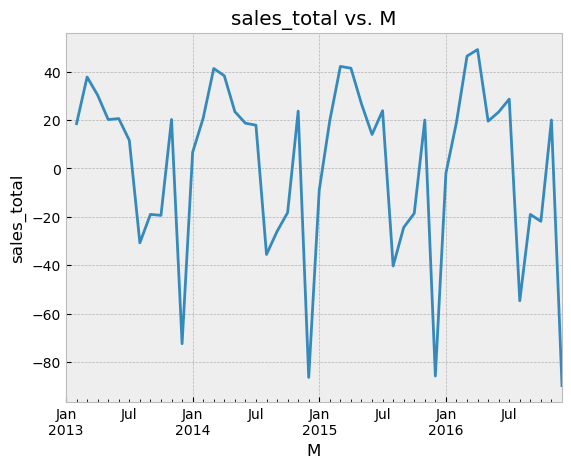

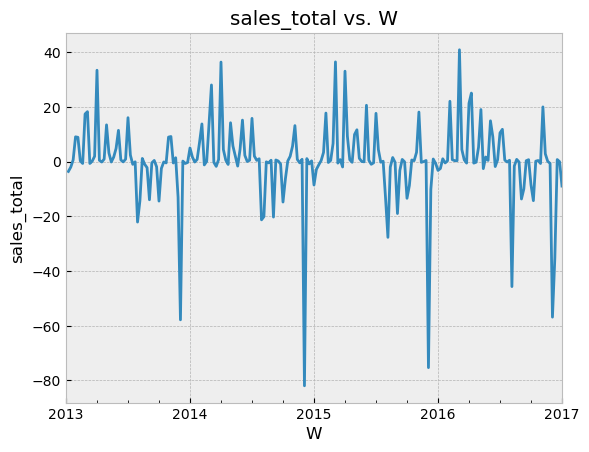

In [66]:
for col in continuous_columns:
    for method in resample_methods:
        store_train[col].resample(method).mean().diff().plot()
        plt.title(f'{col} vs. {method}')
        plt.xlabel(f'{method}')
        plt.ylabel(f'{col}')
        plt.show()

<h5><b><i>
    Takeaways:
</i></b></h5>

- 'item_price'
    - Nuthin'
- 'sales_total'
    - Appears to be peak sales in summer and lowest in winter
    - Sales have been consistently growing over time

---

<a id='storemisc'></a>
### Miscellaneous

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#store'>Store Set Top</a></li>

<div style='background-color: orange'>
<a id='germany'></a>
    <b><u><i><h1 style='text-align: center'>
        Germany Set
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germanysplit'>Split</a></li>
<li><a href='#germanyvisual'>Visual</a></li>
<li><a href='#germanymisc'>Miscellaneous</a></li>

<a id='germanysplit'></a>
### Split

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [31]:
# Get the prepared 'germany' dataframe
germany = p.prepare_germany()
germany.shape

(4383, 6)

In [34]:
# 11 Years are present within 'germany'
germany.index.min(), germany.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

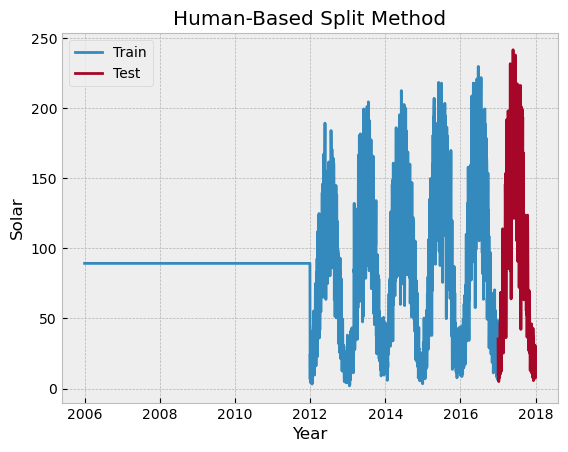

In [37]:
# Split 'germany' using the Human-Based method
train_human = germany[:'2016']
test_human = germany['2017']
plt.plot(train_human.index, train_human.Solar, label='Train')
plt.plot(test_human.index, test_human.Solar, label='Test')
plt.title('Human-Based Split Method')
plt.xlabel('Year')
plt.ylabel('Solar')
plt.legend()
plt.show()

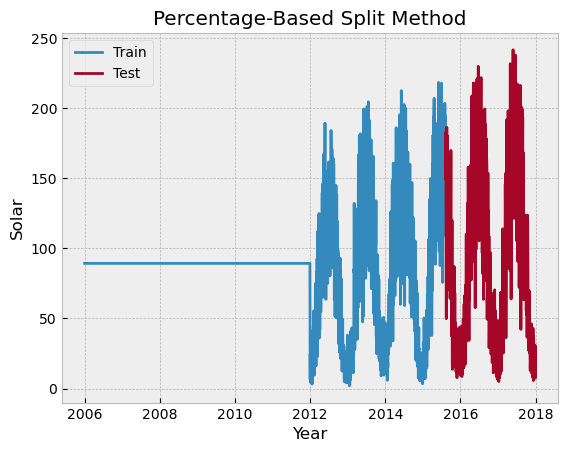

In [39]:
# Split 'germany' using the Percentage-Based Method
train_size = 0.80
n = germany.shape[0]
test_start_index = round(train_size * n)

train_pct = germany.sort_index()[:test_start_index]
test_pct = germany.sort_index()[test_start_index:]
plt.plot(train_pct.index, train_pct.Solar, label='Train')
plt.plot(test_pct.index, test_pct.Solar, label='Test')
plt.title('Percentage-Based Split Method')
plt.xlabel('Year')
plt.ylabel('Solar')
plt.legend()
plt.show()

Human-Based Method seems to give more training data than the Percentage-Based Method...

Using the Human-Based Method

In [40]:
germany_train = germany[:'2016']
germany_test = germany['2017']

---

<a id='germanyvisual'></a>
### Visual

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>

In [55]:
# Identify continuous columns
continuous_columns = germany.select_dtypes(include=float).columns.to_list()
continuous_columns

['Consumption', 'Wind', 'Solar', 'Wind+Solar']

In [56]:
# Identify resampling methods
resample_methods = ['Y', 'M', 'W']
resample_methods

['Y', 'M', 'W']

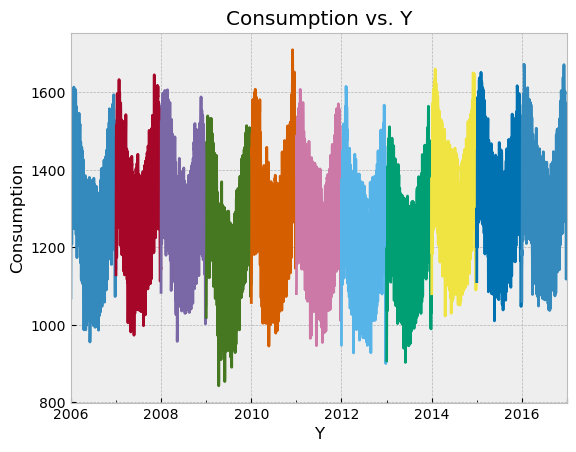

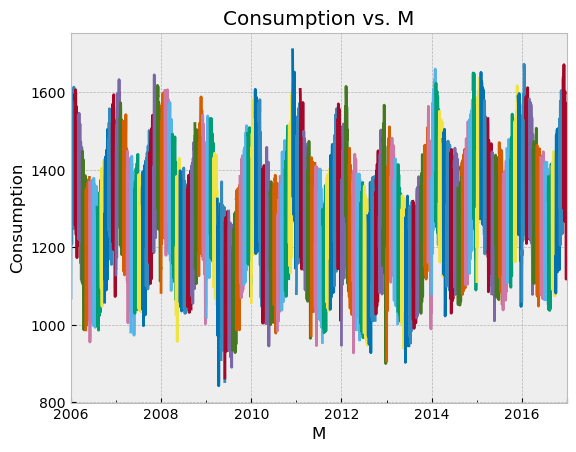

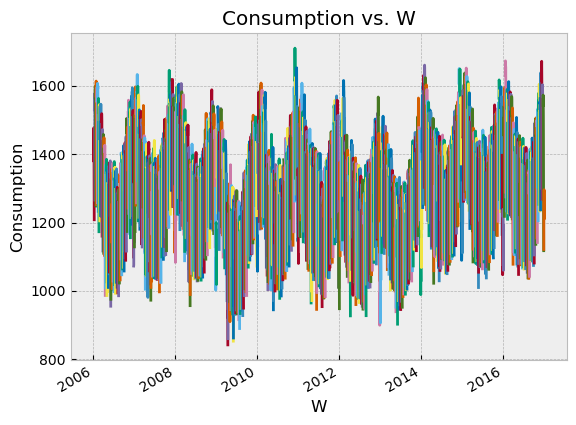

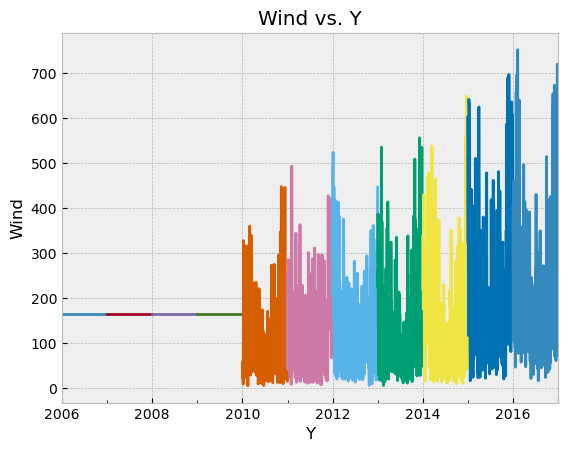

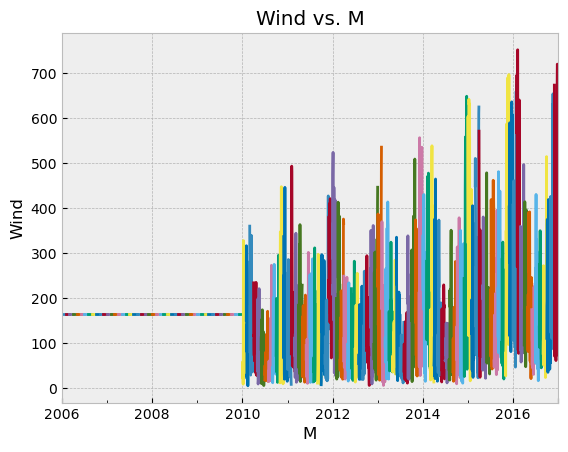

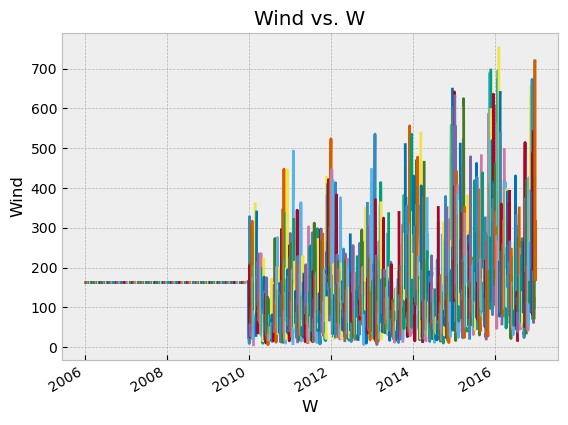

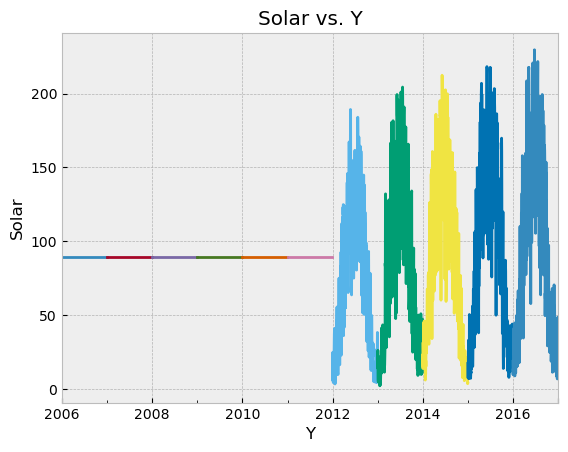

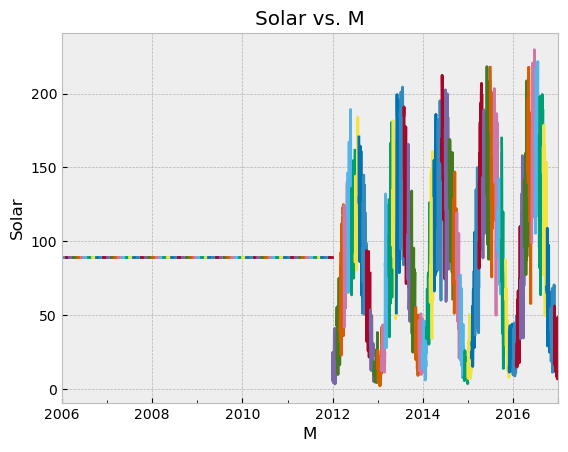

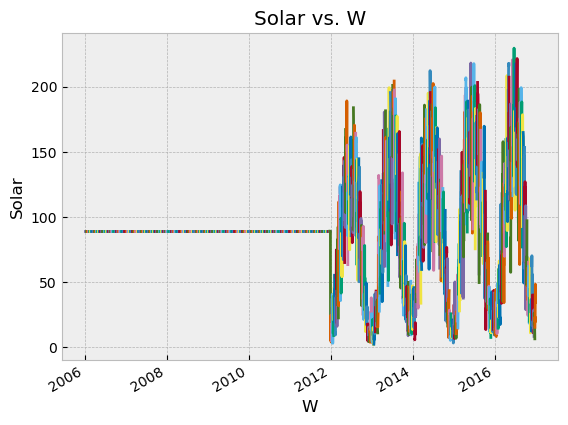

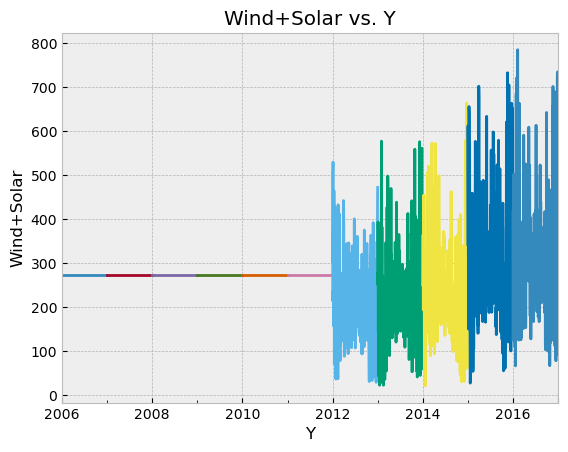

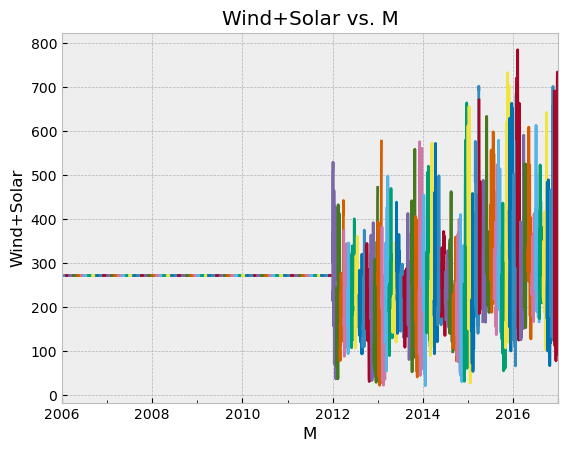

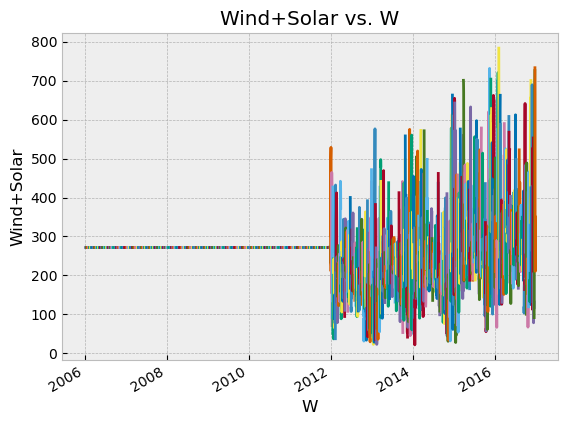

In [58]:
for col in continuous_columns:
    for method in resample_methods:
        germany_train[col].resample(method).plot()
        plt.title(f'{col} vs. {method}')
        plt.xlabel(f'{method}')
        plt.ylabel(f'{col}')
        plt.show()

<h5><b><i>
    Takeaways:
</i></b></h5>

- 'Consumption'
    - Appears to be highest in winter and lowest in summer
    - Seems fairly consistent over time
- 'Wind'
    - Not much data until 2010
    - Has increased over time since 2010
    - Appears to be highest in winter and lowest in summer
- 'Solar'
    - Not much data until 2012
    - Has slightly increased over time since 2012
    - Appears to be highest in summer and lowest in winter
- 'Wind+Solar'
    - Not much data until 2012
    - Has slightly increased over time since 2012
    - Appears to be highest in summer and lowest in winter

---

<a id='germanymisc'></a>
### Miscellaneous

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#germany'>Germany Set Top</a></li>